In [11]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [12]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
urllib.request.urlretrieve(url, 'lena.jpg')
print("✅ lena.jpg berhasil diunduh!")

✅ lena.jpg berhasil diunduh!


In [13]:
image_path = "lena.jpg"
image = cv2.imread(image_path)

Menampilkan citra asli:


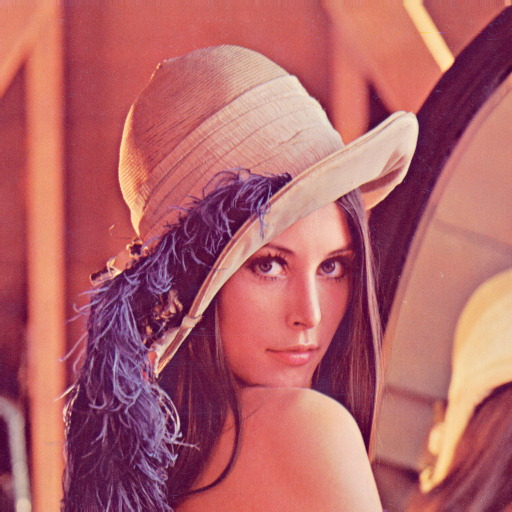

In [14]:
from google.colab.patches import cv2_imshow

if image is None:
  print ("gambar tak ada")
else :
  print("Menampilkan citra asli:")
  cv2_imshow(image)

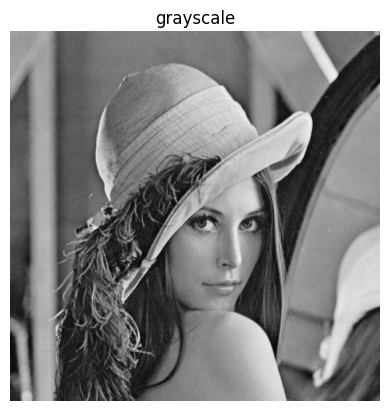

In [15]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img , cmap='gray')
plt.title("grayscale")
plt.axis("off")
plt.show()

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

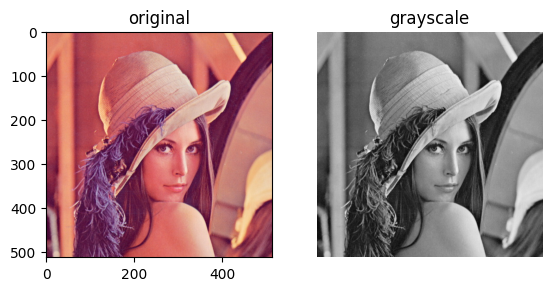

In [16]:
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("grayscale")
plt.imshow(gray_img, cmap='gray')

plt.axis("off")

# translasi, rotasi dan scalling


In [17]:
img = cv2.imread("lena.jpg")
rows, cols = image.shape[:2]

In [18]:
tx, ty = 50, 100
M_translasi = np.float32([[1, 0 ,tx], [0,1,ty]])
dst_translasi = cv2.warpAffine(image, M_translasi, (cols, rows))

center = (cols/2, rows/2)
angle = 45
m_rotasi = cv2.getRotationMatrix2D(center, angle , 1.0)
dst_rotasi = cv2.warpAffine(image, m_rotasi, (cols, rows))

img_scalling = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

In [19]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_translasi = cv2.cvtColor(dst_translasi, cv2.COLOR_BGR2RGB)
img_rotasi = cv2.cvtColor(dst_rotasi, cv2.COLOR_BGR2RGB)
img_scalling = cv2.cvtColor(img_scalling, cv2.COLOR_BGR2RGB)

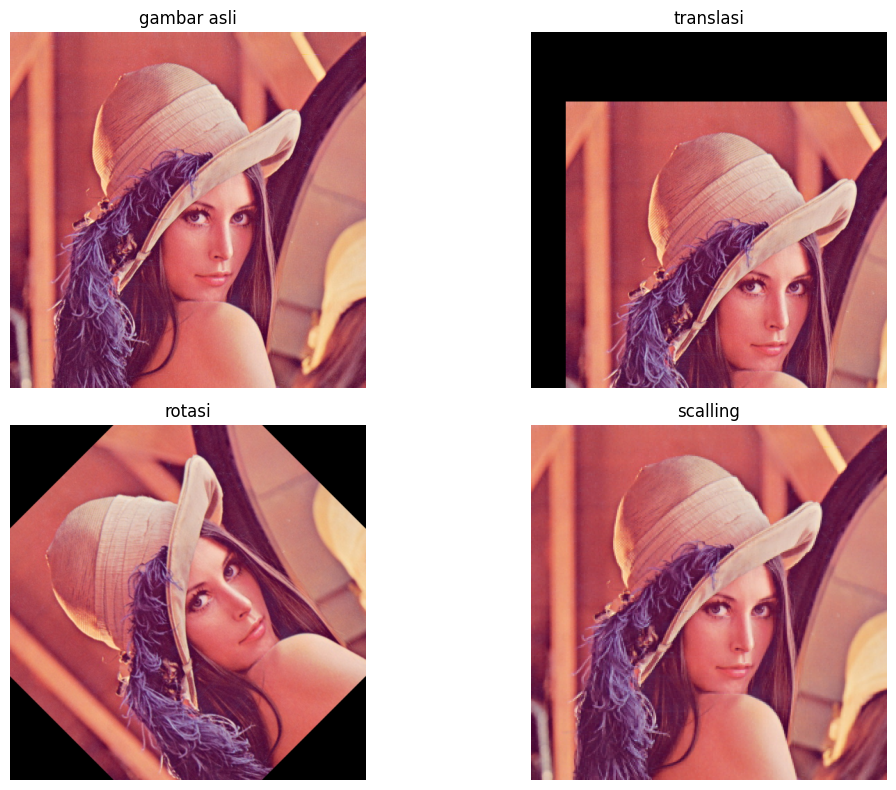

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.title("gambar asli")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(2,2,2)
plt.title("translasi")
plt.imshow(img_translasi)
plt.axis("off")

plt.subplot(2,2,3)
plt.title("rotasi")
plt.imshow(img_rotasi)
plt.axis("off")

plt.subplot(2,2,4)
plt.title("scalling")
plt.imshow(img_scalling)
plt.axis("off")

plt.tight_layout()
plt.show()

# brightening, thresholding, negatif digital, cliping

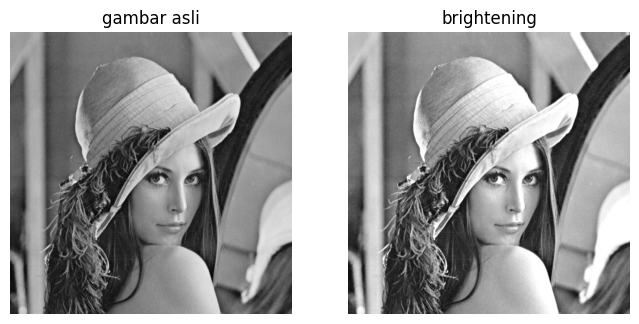

In [23]:
bright_value = 50
bright = cv2.add(gray_img, bright_value* np.ones(gray_img.shape, dtype = np.uint8))

plt.figure(figsize = (8, 4))
plt.subplot(1,2,1)
plt.title("gambar asli")
plt.imshow(gray_img, cmap = 'gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("brightening")
plt.imshow(bright, cmap = 'gray')
plt.axis("off")

plt.show()

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

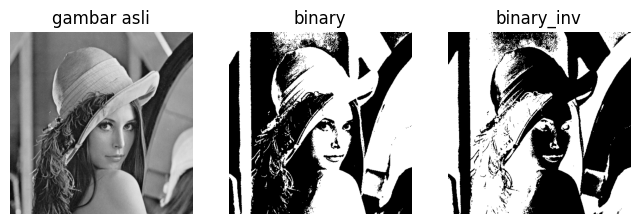

In [24]:
if gray_img is None:
  print("gambar tidak ditemukan")
else:
  _, thresh_binary = cv2.threshold(gray_img, 127, 225, cv2.THRESH_BINARY)
  _, thresh_binary_inv = cv2.threshold(gray_img, 127,225, cv2.THRESH_BINARY_INV)

plt.figure(figsize = (8,4))
plt.subplot(1,3,1)
plt.title("gambar asli")
plt.imshow(gray_img, cmap = "gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("binary")
plt.imshow(thresh_binary, cmap = "gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("binary_inv")
plt.imshow(thresh_binary_inv, cmap = "gray")
plt.axis("off")

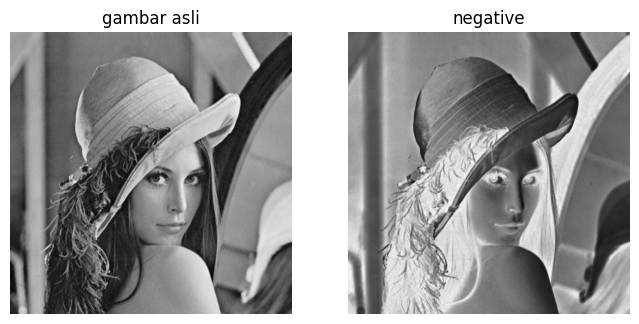

In [26]:
if gray_img is None:
  print("gambar tidak ditemukan")
else:
  negative = 255 - gray_img

plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.title("gambar asli")
plt.imshow(gray_img, cmap= 'gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("negative")
plt.imshow(negative, cmap = 'gray')
plt.axis("off")

plt.show()

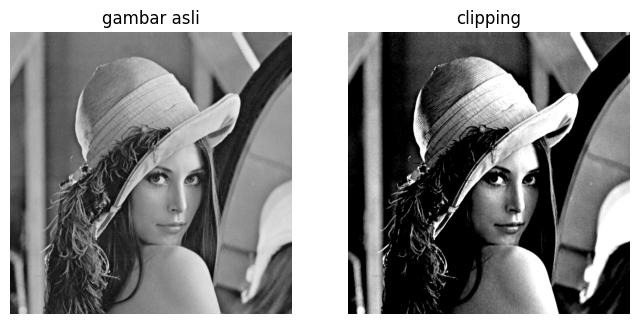

In [25]:
if gray_img is None:
  print("gambar tidak ditemukan")
else:
  min_val , max_val = 100,200
  clipping = np.clip(gray_img, min_val, max_val)
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.title("gambar asli")
plt.imshow(gray_img, cmap= 'gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("clipping")
plt.imshow(clipping, cmap = 'gray')
plt.axis("off")

plt.show()

#histogram

In [36]:
def histogram(img, title = 'image'):
  plt.figure(figsize = (10,4))

  plt.subplot(1,2,1)
  plt.imshow(img, cmap = 'gray' if len (img.shape) == 2 else None)
  plt.title(f'{title}image')
  plt.axis ('off')

  plt.subplot(1,2,2)
  if len (img.shape) == 2:
    plt.hist(img.ravel(), bins = 256, range = (0, 256) , color = 'k')
  else:
    import cv2
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i, c in enumerate (('r','g','b')):
      plt.hist(rgb[:, :, i].ravel(), bins = 256, range = (0, 2546), color = c, alpha = 0.5)
  plt.title(f'{title}histogram')
  plt.xlim(0, 255)

  plt.tight_layout()
  plt.show()

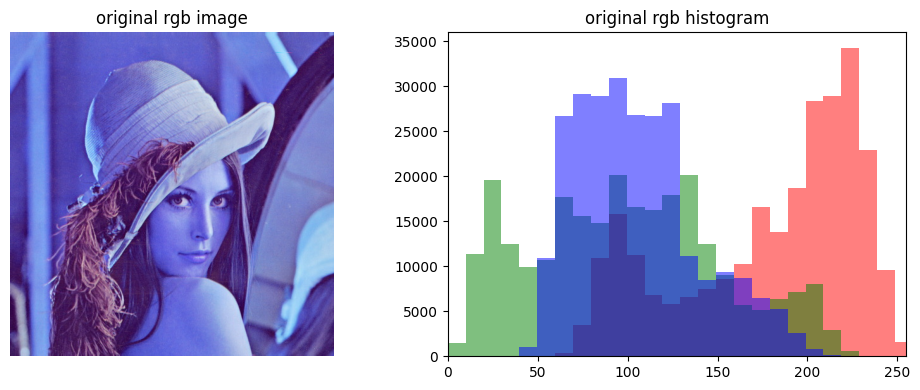

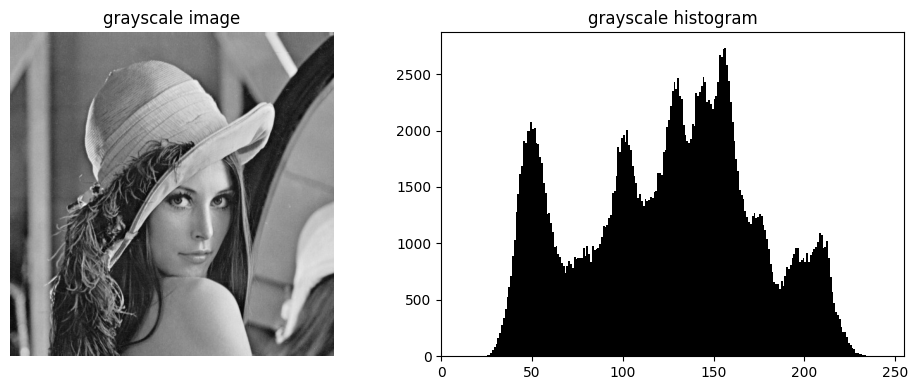

In [37]:
histogram(image, "original rgb ")
histogram(gray_img, "grayscale ")

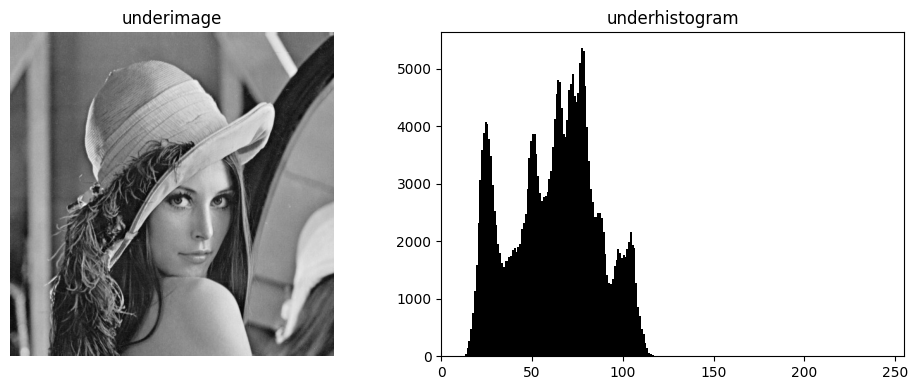

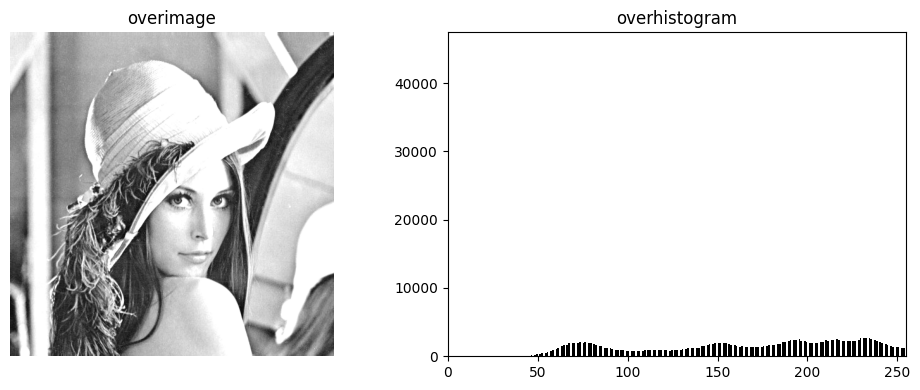

In [38]:
def exposure(img, factor):
  return(img.astype(np.float32)*factor).clip(0,255).astype(np.uint8)

g_under = exposure(gray_img, 0.5)
g_over = exposure(gray_img, 2.5)

histogram (g_under, "under")
histogram(g_over, "over")

# filtering spacial

In [40]:
url = 'https://user-images.githubusercontent.com/85081014/224490404-568cdeaa-8013-449a-b79d-ea9c320fd677.png'
urllib.request.urlretrieve(url, 'lena2.jpg')
print("✅ lena2.jpg berhasil diunduh!")

✅ lena2.jpg berhasil diunduh!


In [53]:
img2 = cv2.imread("lena2.jpg", cv2.IMREAD_GRAYSCALE)

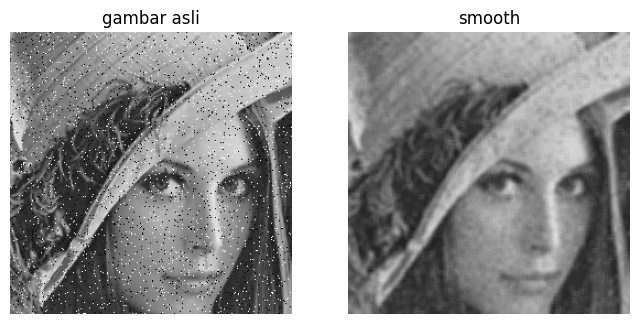

In [42]:
# average blur

kernel_smooth = np.ones((5,5), np.float32)/25
smooth = cv2.filter2D(img2, -1, kernel_smooth)

plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.title("gambar asli")
plt.imshow(img2, cmap = 'gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("smooth")
plt.imshow(smooth, cmap = 'gray')
plt.axis("off")

plt.show()

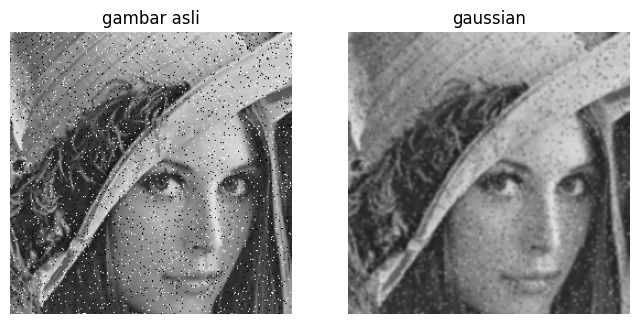

In [45]:
#gaussian

gaussian = cv2.GaussianBlur(img2, (5,5), 0)

plt.figure(figsize = (8, 4))
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')
plt.title("gambar asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gaussian, cmap= 'gray')
plt.title("gaussian")
plt.axis("off")

plt.show()

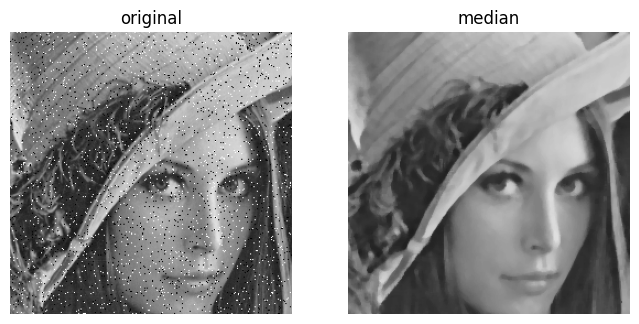

In [46]:
# median
median = cv2.medianBlur(img2, 5)

plt.figure(figsize = (8, 4))
plt.subplot(1,2,1)
plt.imshow(img2, cmap = "gray")
plt.title("original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(median, cmap = "gray")
plt.title("median")
plt.axis("off")

plt.show()

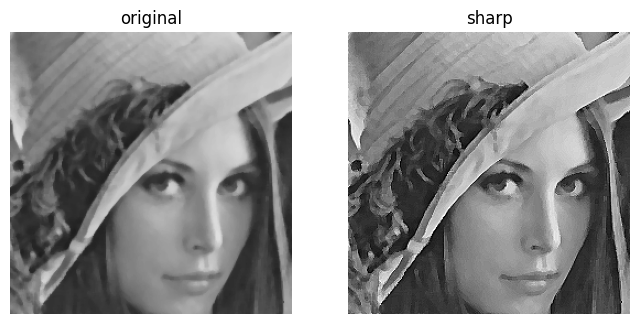

In [48]:
#sharphing

kernel_sharp = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharp = cv2.filter2D(median, -1, kernel_sharp)

plt.figure(figsize = (8, 4))
plt.subplot(1,2,1)
plt.imshow(median, cmap = "gray")
plt.title("original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharp, cmap = "gray")
plt.title("sharp")
plt.axis("off")

plt.show()

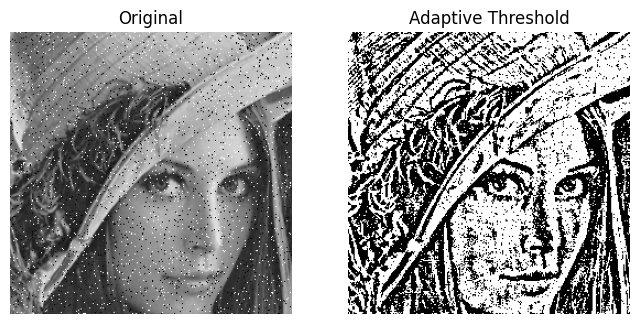

In [54]:
#adaptive threashold
adaptive = cv2.adaptiveThreshold(img2, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 11, 2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(img2, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2), plt.imshow(adaptive, cmap='gray'), plt.title('Adaptive Threshold')
plt.axis('off')
plt.show()

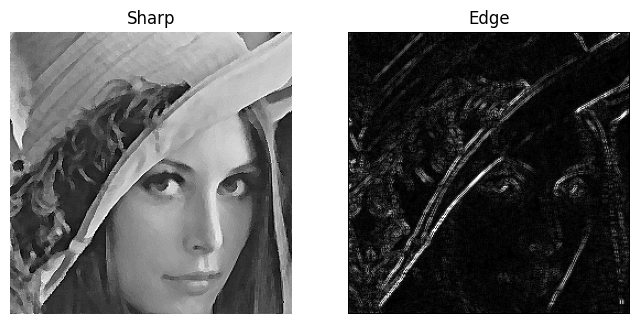

In [49]:
#edge detection

edge = cv2.Sobel(sharp, cv2.CV_64F, 1, 1, ksize = 3)
edge = cv2.convertScaleAbs(edge)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(sharp, cmap='gray'), plt.title('Sharp')
plt.axis('off')
plt.subplot(1,2,2), plt.imshow(edge, cmap='gray'), plt.title('Edge')
plt.axis('off')
plt.show()

# sobel, canny , orde 2, orde 1(roberts), laplacian

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


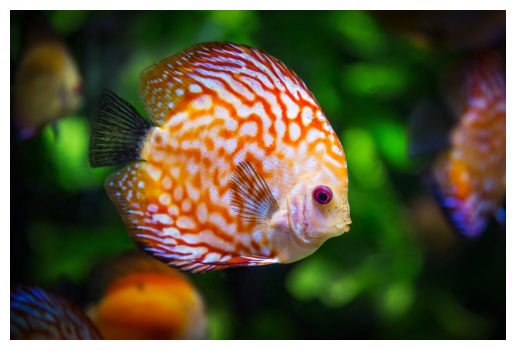

In [56]:
image_path = '/content/drive/MyDrive/colab_data/ikan.jpg'
img_data = cv2.imread(image_path)

if img_data is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

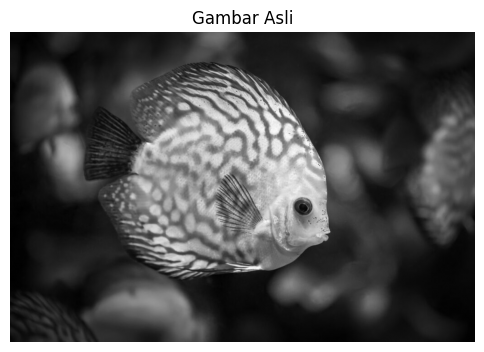

In [58]:
IKAN_GRAY = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,5))
plt.imshow(IKAN_GRAY, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.show()

In [60]:
#sobel
s_x = cv2.Sobel(IKAN_GRAY, cv2.CV_64F, 1, 0, ksize=3)
s_y = cv2.Sobel(IKAN_GRAY, cv2.CV_64F, 0, 1, ksize=3)
s_mag = cv2.magnitude(s_x, s_y)

sobel_x = cv2.convertScaleAbs(s_x)
sobel_y = cv2.convertScaleAbs(s_y)
sobel_magnitude = cv2.convertScaleAbs(s_mag)

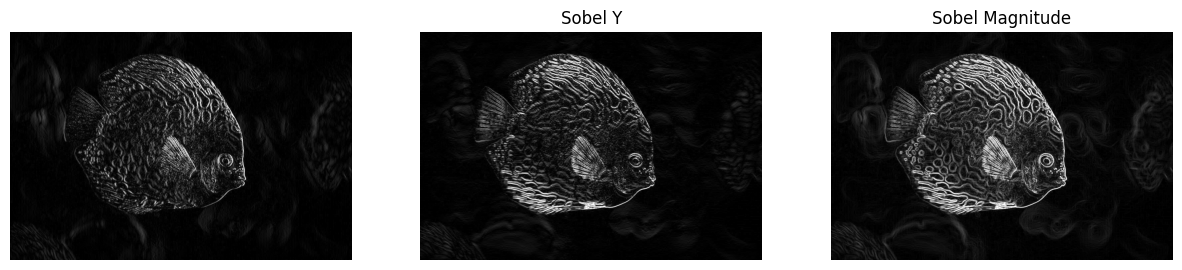

In [61]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.show()

<function matplotlib.pyplot.axis(arg: 'tuple[float, float, float, float] | bool | str | None' = None, /, *, emit: 'bool' = True, **kwargs) -> 'tuple[float, float, float, float]'>

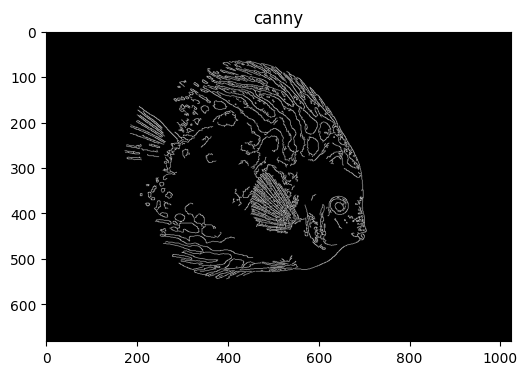

In [63]:
#canny

canny = cv2.Canny(IKAN_GRAY, 75, 200)
plt.figure(figsize=(6,5))
plt.imshow(canny, cmap='gray')
plt.title('canny')
plt.axis

In [64]:
blur = cv2.GaussianBlur(IKAN_GRAY, (5,5), sigmaX=0)
lap = cv2.Laplacian(blur,cv2.CV_64F)
log = cv2.convertScaleAbs(lap)

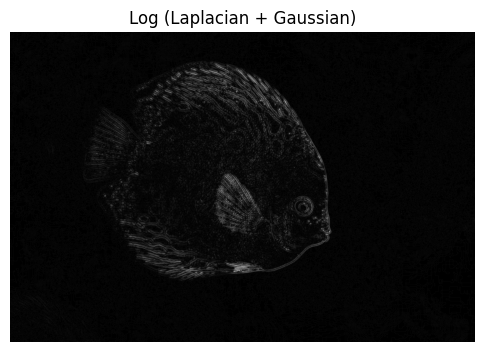

In [65]:
plt.figure(figsize=(6,5))
plt.imshow(log, cmap='gray')
plt.title('Log (Laplacian + Gaussian)')
plt.axis('off')

plt.show()

In [66]:
#roberts
kernel_roberts_x = np.array([[1, 0],
                             [0, -1]])

kernel_roberts_y = np.array([[0, 1],
                             [-1, 0]])

In [67]:
roberts_x = cv2.filter2D(IKAN_GRAY, -1, kernel_roberts_x)
roberts_y = cv2.filter2D(IKAN_GRAY, -1, kernel_roberts_y)
roberts_mag = cv2.magnitude(roberts_x.astype('float32'),
                            roberts_y.astype('float32'))

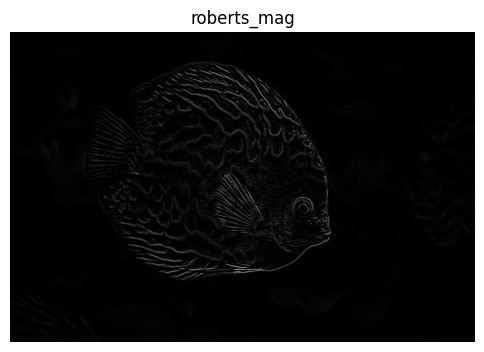

In [68]:
plt.figure(figsize=(6,5))
plt.imshow(roberts_mag, cmap='gray')
plt.title('roberts_mag')
plt.axis('off')

plt.show()

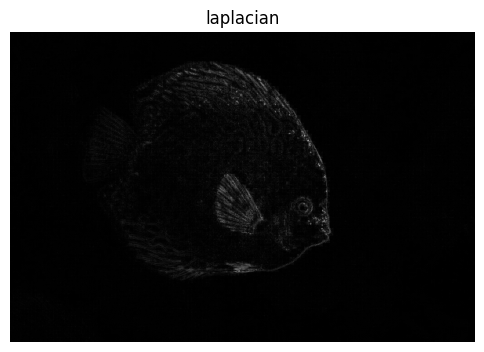

In [69]:
#laplacian
laplacian = cv2.Laplacian(IKAN_GRAY, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(6,5))
plt.imshow(laplacian, cmap='gray')
plt.title('laplacian')
plt.axis('off')

plt.show()

# threshold, morfologi, contour detection,

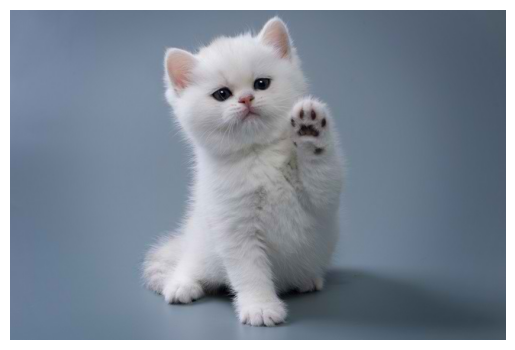

In [70]:
image_path = '/content/drive/MyDrive/colab_data/kucing.jpg'
img_data = cv2.imread(image_path)

if img_data is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [71]:
image_rgb = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(649.5), np.float64(432.5), np.float64(-0.5))

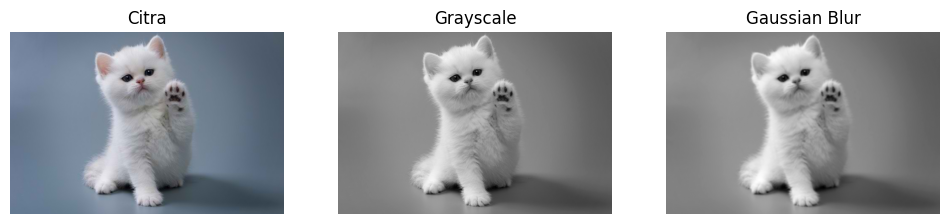

In [72]:
from IPython.core.pylabtools import figsize
gray_image = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Citra")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

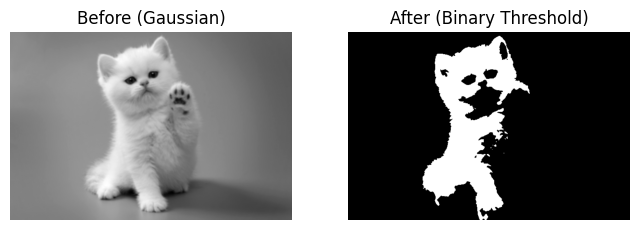

In [73]:
#threshold

ret, threshold_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_OTSU)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(blurred_image, cmap='gray')
plt.title("Before (Gaussian)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(threshold_image, cmap='gray')
plt.title("After (Binary Threshold)")
plt.axis('off')
plt.show()

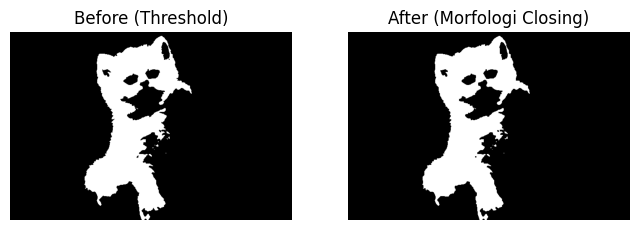

In [74]:
#morfologi
kernel = np.ones((3,3), np.uint8)
closing_image = cv2.morphologyEx(threshold_image, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(threshold_image, cmap='gray')
plt.title("Before (Threshold)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(closing_image, cmap='gray')
plt.title("After (Morfologi Closing)")
plt.axis('off')
plt.show()

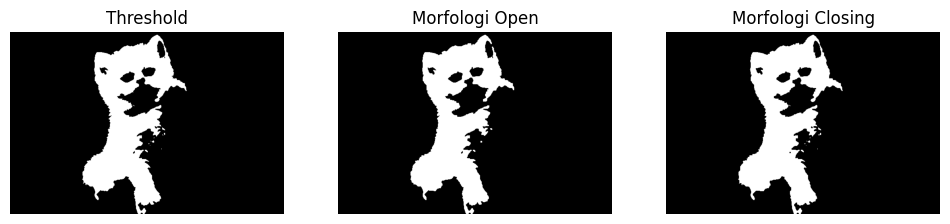

In [75]:

open_image = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel, iterations=1)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(threshold_image, cmap='gray')
plt.title("Threshold")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(open_image, cmap='gray')
plt.title("Morfologi Open")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(closing_image, cmap='gray')
plt.title("Morfologi Closing")
plt.axis('off')

plt.show()


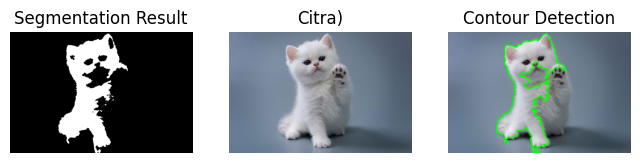

In [76]:
#contour detection

contours, hierarchy = cv2.findContours(
    closing_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_contour = image_rgb.copy()

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 3000:
        cv2.drawContours(image_contour, [contour], -1, (0, 255, 0), 3)

plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
plt.imshow(closing_image, cmap='gray')
plt.title("Segmentation Result")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image_rgb)
plt.title("Citra)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_contour)
plt.title("Contour Detection")
plt.axis('off')
plt.show()